# Credit Card Customer Segmentation Using RFM Analysis and Clustering for Customer Insight and Strategy Development

In [1]:
#These are some of the libraries needed for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
dataset = pd.read_csv("/Users/mac/Downloads/CC GENERAL.csv")

In [3]:
dataset.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
dataset.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# .describe() function by default only looks at numeric data 

dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# this would display all object type data 

dataset.describe(include = "O")

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [8]:
#exploring the missing data in this column

dataset[dataset["MINIMUM_PAYMENTS"].isna()].head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,C10065,7.152356,0.090909,840.00,840.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
93,C10098,1307.717841,1.000000,405.60,405.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,NaN,0.0,12
94,C10099,2329.485768,1.000000,213.34,213.34,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2400.0,0.000000,NaN,0.0,12
97,C10102,3505.671311,1.000000,0.00,0.00,0.0,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,NaN,0.0,12


In [9]:
#exploring the missing data in this column

dataset[dataset["CREDIT_LIMIT"].isna()].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
dataset[(dataset["PAYMENTS"] == 0) & (dataset["BALANCE"] > 0)]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.0,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,C19095,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.0,NaN,0.0,8
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.0,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.0,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.0,NaN,0.0,6


## Data Cleaning 

In [11]:
cleaned_dataset = dataset.copy()

In [12]:
cleaned_dataset.dropna(subset = ["MINIMUM_PAYMENTS", "CREDIT_LIMIT"], inplace = True)



In [13]:
cleaned_dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
len(cleaned_dataset[cleaned_dataset["BALANCE"] == 0])

6

In [15]:
len(cleaned_dataset) / len(dataset)

0.9649162011173185

Dropped 3.5% of records

## Feature Engineering

In [16]:
cleaned_dataset["TOTAL_SPENT"] = cleaned_dataset["PURCHASES"] + cleaned_dataset["CASH_ADVANCE"]



In [17]:
cleaned_dataset["Frequency"] = cleaned_dataset["PURCHASES_TRX"] + cleaned_dataset["CASH_ADVANCE_TRX"]


In [18]:
cleaned_dataset["Recency"] = cleaned_dataset["TENURE"].max() - cleaned_dataset["TENURE"]



In [19]:
cleaned_dataset[["TOTAL_SPENT", "Frequency", "Recency"]].describe()


,TOTAL_SPENT,Frequency,Recency
count,8636.000000,8636.000000,8636.000000
mean,2019.609398,18.347151,0.465609
std,2950.021139,25.642004,1.310984
min,0.000000,0.000000,0.000000
25%,379.657727,4.000000,0.000000
50%,1095.547789,11.000000,0.000000
75%,2556.492426,22.000000,0.000000
max,49597.736886,358.000000,6.000000


In [20]:
aggregated_dataset = cleaned_dataset.groupby("CUST_ID", as_index =False).agg({
    "Recency" : "max",
    "Frequency" : "sum", 
    "TOTAL_SPENT" : "sum"
})



In [21]:
aggregated_dataset.rename(columns = {
    "TOTAL_SPENT" : "MonetaryValue",
    "Frequency" : "Frequency", 
    "Recency" : "Recency"
}, inplace = True)

In [22]:
aggregated_dataset.head(10)

,CUST_ID,Recency,Frequency,MonetaryValue
0,C10001,0,2,95.400000
1,C10002,0,4,6442.945483
2,C10003,0,12,773.170000
3,C10005,0,1,16.000000
4,C10006,0,8,1333.280000
5,C10007,0,64,7091.010000
6,C10008,0,12,436.200000
7,C10009,0,5,861.490000
8,C10010,0,3,1281.600000
9,C10011,0,12,920.120000


In [23]:
aggregated_dataset.tail(10)

,CUST_ID,Recency,Frequency,MonetaryValue
8626,C19179,6,7,1113.186078
8627,C19180,6,4,974.291038
8628,C19181,6,6,591.240000
8629,C19182,6,18,8769.959326
8630,C19183,6,6,113.280000
8631,C19184,6,1,20.900000
8632,C19186,6,6,291.120000
8633,C19188,6,5,144.400000
8634,C19189,6,2,36.558778
8635,C19190,6,25,1220.290008


In [24]:
aggregated_dataset.describe()

,Recency,Frequency,MonetaryValue
count,8636.000000,8636.000000,8636.000000
mean,0.465609,18.347151,2019.609398
std,1.310984,25.642004,2950.021139
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,379.657727
50%,0.000000,11.000000,1095.547789
75%,0.000000,22.000000,2556.492426
max,6.000000,358.000000,49597.736886


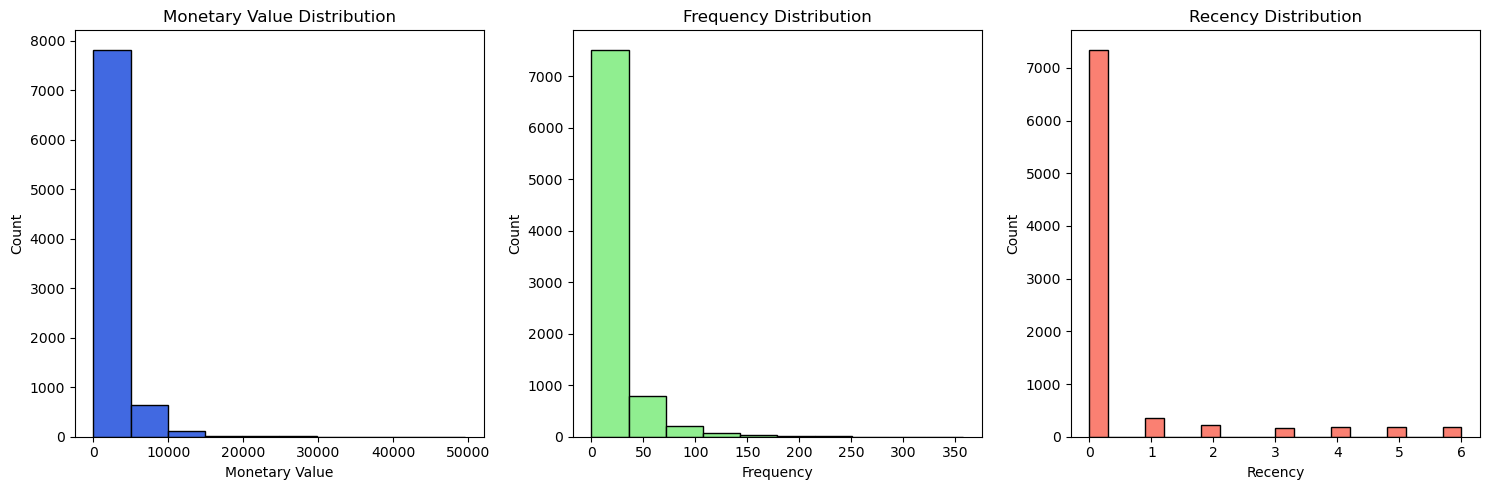

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_dataset["MonetaryValue"], bins = 10, color = "royalblue", edgecolor = "black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(aggregated_dataset["Frequency"], bins = 10, color = "lightgreen", edgecolor = "black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(aggregated_dataset["Recency"], bins = 20, color = "salmon", edgecolor = "black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()




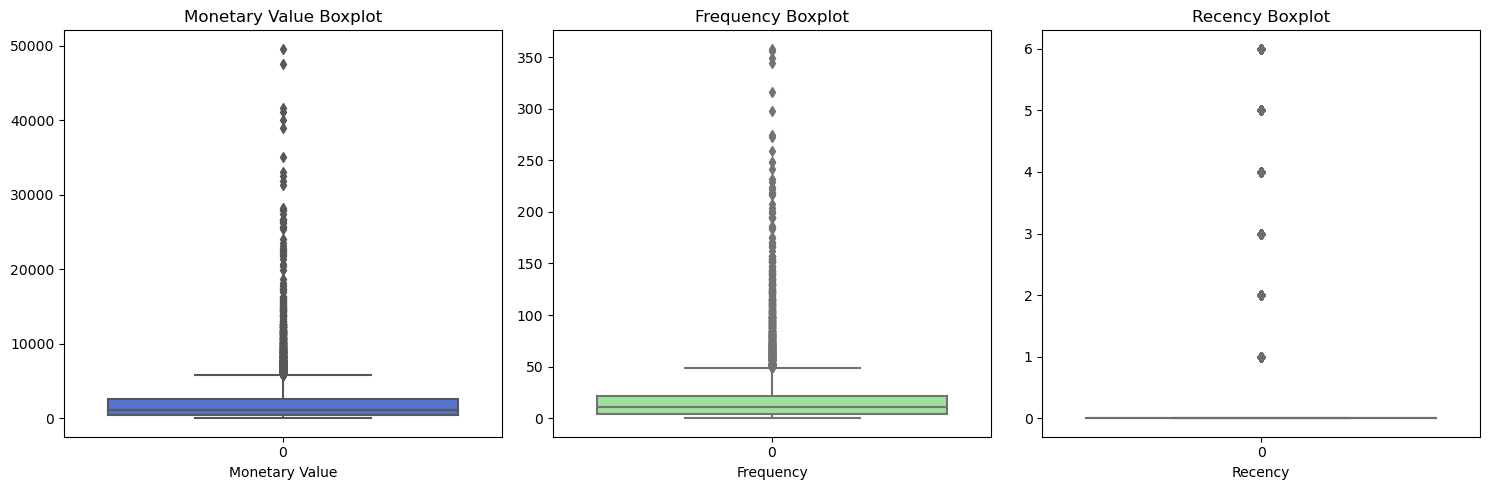

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_dataset["MonetaryValue"], color = "royalblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")


plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_dataset["Frequency"], color = "lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")


plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_dataset["Recency"], color = "salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

In [27]:
M_Q1 = aggregated_dataset["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_dataset["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_dataset = aggregated_dataset[(aggregated_dataset["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_dataset["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_dataset.describe()


,Recency,Frequency,MonetaryValue
count,600.000000,600.000000,600.000000
mean,0.445000,57.060000,9939.467873
std,1.271352,56.733007,5712.749833
min,0.000000,1.000000,5823.467109
25%,0.000000,17.000000,6738.712716
50%,0.000000,39.500000,8245.390557
75%,0.000000,81.000000,10702.765000
max,6.000000,358.000000,49597.736886


In [28]:
F_Q1 = aggregated_dataset["Frequency"].quantile(0.25)
F_Q3 = aggregated_dataset["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_dataset = aggregated_dataset[(aggregated_dataset["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_dataset["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_dataset.describe()


,Recency,Frequency,MonetaryValue
count,670.000000,670.000000,670.000000
mean,0.129851,86.228358,6403.511602
std,0.684772,45.053532,6163.573169
min,0.000000,50.000000,451.010000
25%,0.000000,57.000000,2984.575000
50%,0.000000,71.000000,4794.420000
75%,0.000000,98.000000,7564.064072
max,6.000000,358.000000,49597.736886


In [29]:
R_Q1 = aggregated_dataset["Recency"].quantile(0.25)
R_Q3 = aggregated_dataset["Recency"].quantile(0.75)
R_IQR = R_Q3 - R_Q1

recency_outliers_dataset = aggregated_dataset[(aggregated_dataset["Recency"] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_dataset["Recency"] < (R_Q1 - 1.5 * R_IQR))].copy()

recency_outliers_dataset.describe()


,Recency,Frequency,MonetaryValue
count,1290.000000,1290.000000,1290.000000
mean,3.117054,11.514729,1959.697794
std,1.800639,14.248112,2561.606097
min,1.000000,1.000000,9.900000
25%,1.000000,4.000000,388.455000
50%,3.000000,8.000000,1136.694409
75%,5.000000,14.000000,2534.778328
max,6.000000,186.000000,26582.340000


In [30]:
non_outliers_dataset = aggregated_dataset[(~aggregated_dataset.index.isin(monetary_outliers_dataset.index)) & (~aggregated_dataset.index.isin(frequency_outliers_dataset)) & (~aggregated_dataset.index.isin(recency_outliers_dataset))]

non_outliers_dataset.describe()



,Recency,Frequency,MonetaryValue
count,8036.000000,8036.000000,8036.000000
mean,0.467148,15.456695,1428.280990
std,1.313959,18.611770,1373.319248
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,347.372621
50%,0.000000,10.000000,965.000000
75%,0.000000,19.000000,2126.885459
max,6.000000,273.000000,5819.460000


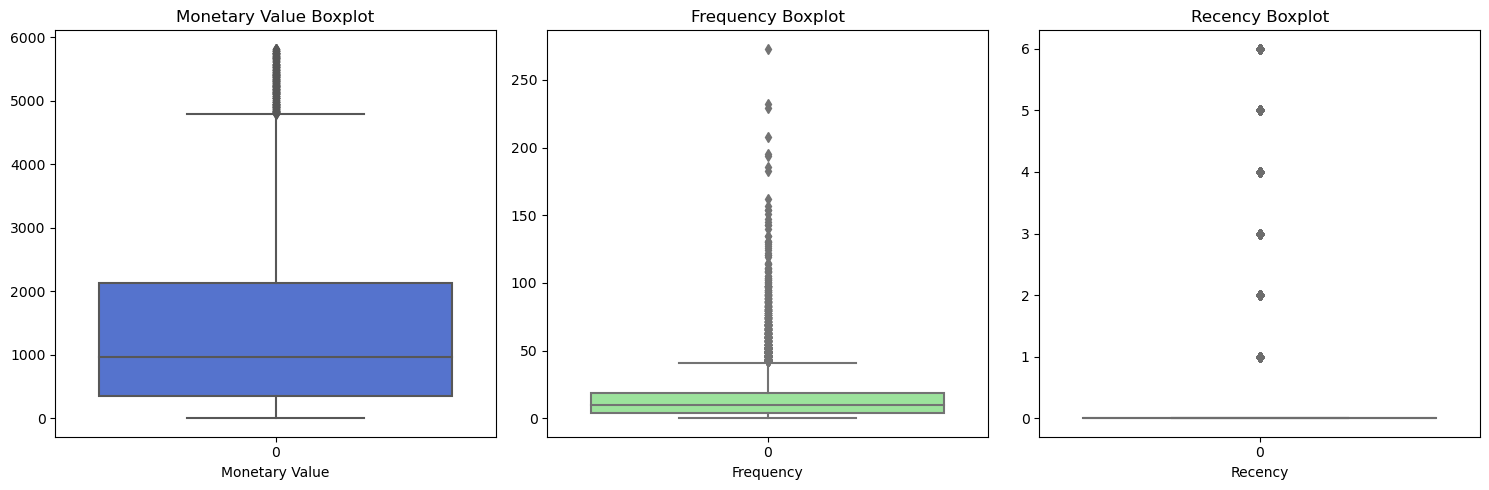

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_dataset["MonetaryValue"], color = "royalblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")


plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers_dataset["Frequency"], color = "lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")


plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers_dataset["Recency"], color = "salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

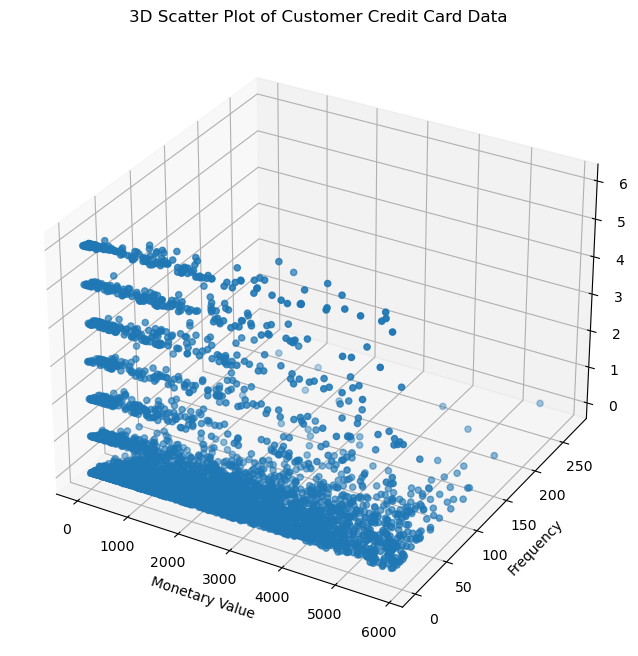

In [32]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_dataset["MonetaryValue"], non_outliers_dataset["Frequency"], non_outliers_dataset["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Credit Card Data")

plt.show()




In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_dataset[["MonetaryValue", "Frequency", "Recency"]])
scaled_data



array([[-0.97061476, -0.72306567, -0.35554915],
       [-0.47705714, -0.18573784, -0.35554915],
       [-1.02843448, -0.77679845, -0.35554915],
       ...,
       [-0.93493256, -0.56186732,  4.21108852],
       [-1.01346341, -0.72306567,  4.21108852],
       [-0.15146072,  0.51278834,  4.21108852]])

In [34]:
scaled_data_dataset = pd.DataFrame(scaled_data, index = non_outliers_dataset.index, columns = ("MonetaryValue", "Frequency", "Recency"))
scaled_data_dataset


,MonetaryValue,Frequency,Recency
0,-0.970615,-0.723066,-0.355549
2,-0.477057,-0.185738,-0.355549
3,-1.028434,-0.776798,-0.355549
4,-0.069180,-0.400669,-0.355549
6,-0.722441,-0.185738,-0.355549
...,...,...,...
8631,-1.024866,-0.776798,4.211089
8632,-0.828090,-0.508135,4.211089
8633,-0.934933,-0.561867,4.211089
8634,-1.013463,-0.723066,4.211089


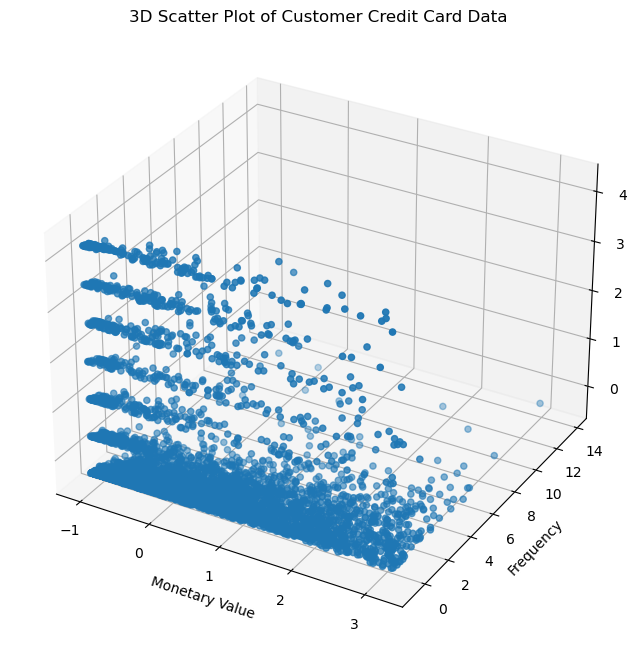

In [35]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data_dataset["MonetaryValue"], scaled_data_dataset["Frequency"], scaled_data_dataset["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Credit Card Data")

plt.show()


## KMeans Clustering

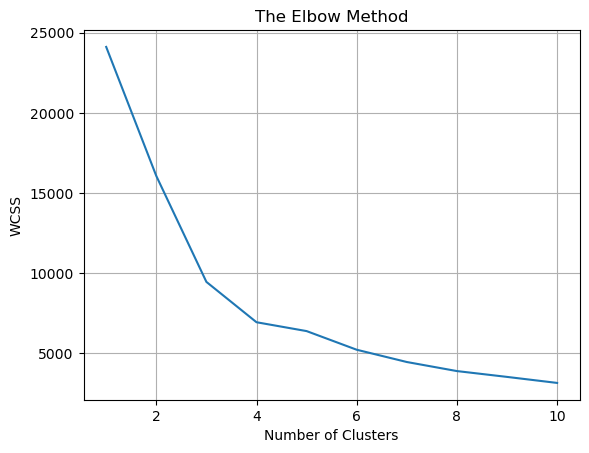

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(scaled_data_dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [37]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data_dataset)
cluster_labels = y_kmeans

cluster_labels


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [38]:
non_outliers_dataset["Cluster"] = cluster_labels

non_outliers_dataset

/var/folders/f3/fqxdbsyn3jq3f5wlphvdssgm0000gn/T/ipykernel_1878/3802603211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_dataset["Cluster"] = cluster_labels


,CUST_ID,Recency,Frequency,MonetaryValue,Cluster
0,C10001,0,2,95.400000,0
2,C10003,0,12,773.170000,0
3,C10005,0,1,16.000000,0
4,C10006,0,8,1333.280000,0
6,C10008,0,12,436.200000,0
...,...,...,...,...,...
8631,C19184,6,1,20.900000,1
8632,C19186,6,6,291.120000,1
8633,C19188,6,5,144.400000,1
8634,C19189,6,2,36.558778,1


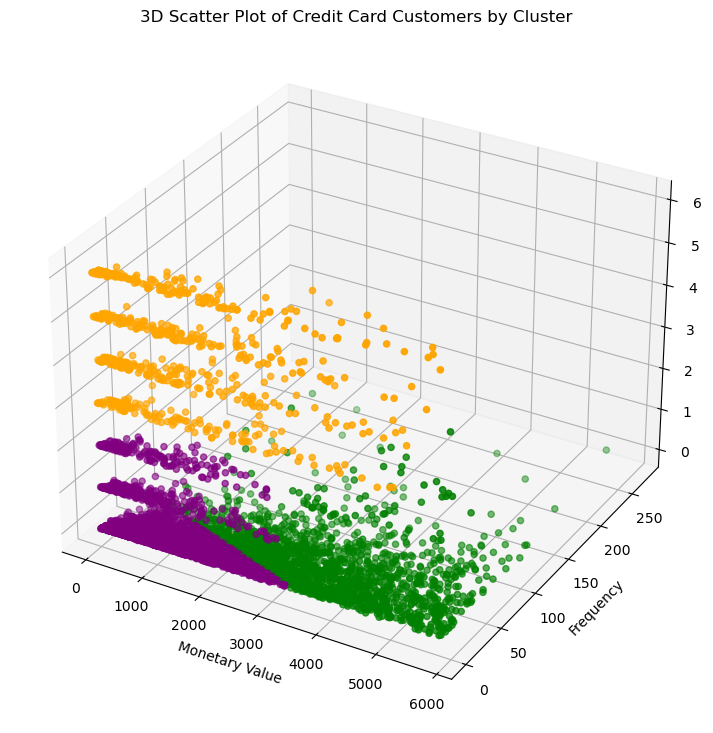

In [39]:
cluster_colors = {0: "purple",
                  1: "orange",
                  2: "green"}

colors = non_outliers_dataset["Cluster"].map(cluster_colors)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_dataset["MonetaryValue"],
                    non_outliers_dataset["Frequency"], 
                    non_outliers_dataset["Recency"],
                    c = colors)

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Credit Card Customers by Cluster")

plt.show()


## Hierarchical Clustering 

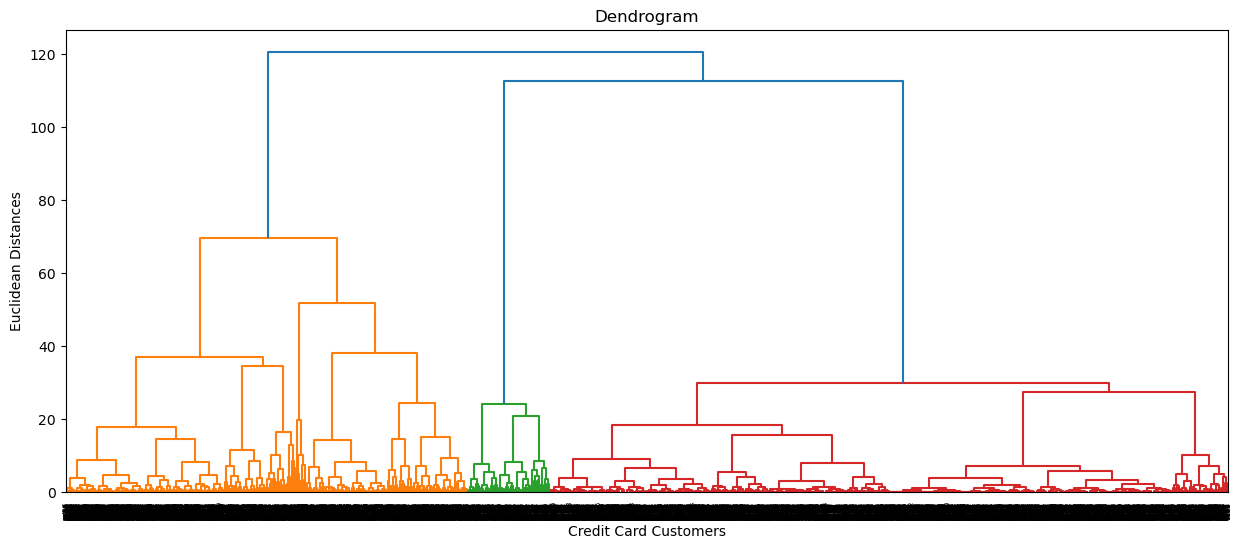

In [40]:
#Using the dendrogram to find the optimal number of clusters 
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data_dataset, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Credit Card Customers")
plt.ylabel("Euclidean Distances")
plt.show()


In [41]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(scaled_data_dataset)



In [42]:
non_outliers_dataset["Cluster"] = y_hc

non_outliers_dataset

/var/folders/f3/fqxdbsyn3jq3f5wlphvdssgm0000gn/T/ipykernel_1878/2494502339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_dataset["Cluster"] = y_hc


,CUST_ID,Recency,Frequency,MonetaryValue,Cluster
0,C10001,0,2,95.400000,1
2,C10003,0,12,773.170000,1
3,C10005,0,1,16.000000,1
4,C10006,0,8,1333.280000,1
6,C10008,0,12,436.200000,1
...,...,...,...,...,...
8631,C19184,6,1,20.900000,2
8632,C19186,6,6,291.120000,2
8633,C19188,6,5,144.400000,2
8634,C19189,6,2,36.558778,2


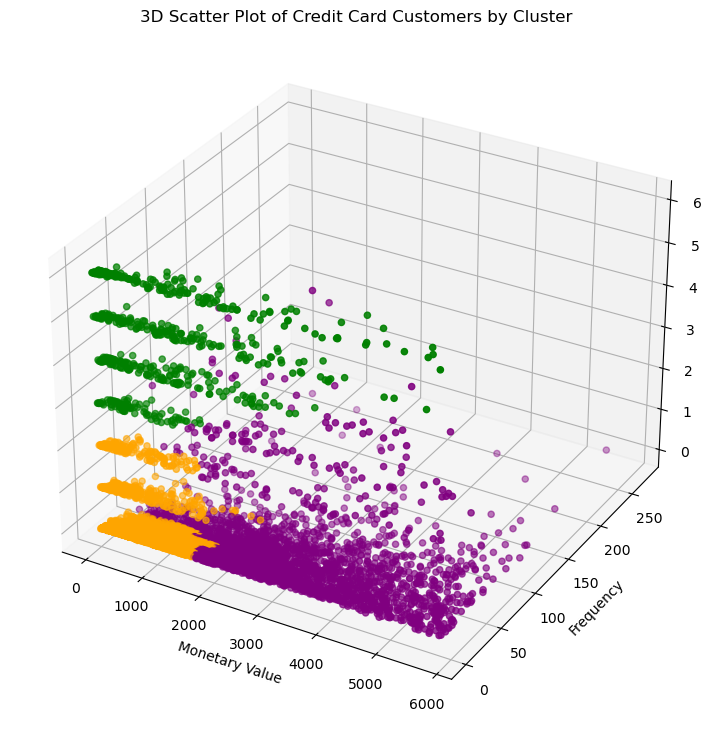

In [43]:
# Visualising the clusters

cluster_colors = {0: "purple",
                  1: "orange",
                  2: "green"}

colors = non_outliers_dataset["Cluster"].map(cluster_colors)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_dataset["MonetaryValue"],
                    non_outliers_dataset["Frequency"], 
                    non_outliers_dataset["Recency"],
                    c = colors) #Uses mapped color values

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Credit Card Customers by Cluster")

plt.show()



## Cluster Analysis

### KMeans Clustering 

/var/folders/f3/fqxdbsyn3jq3f5wlphvdssgm0000gn/T/ipykernel_1878/1856972952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_dataset["Cluster"] = y_kmeans


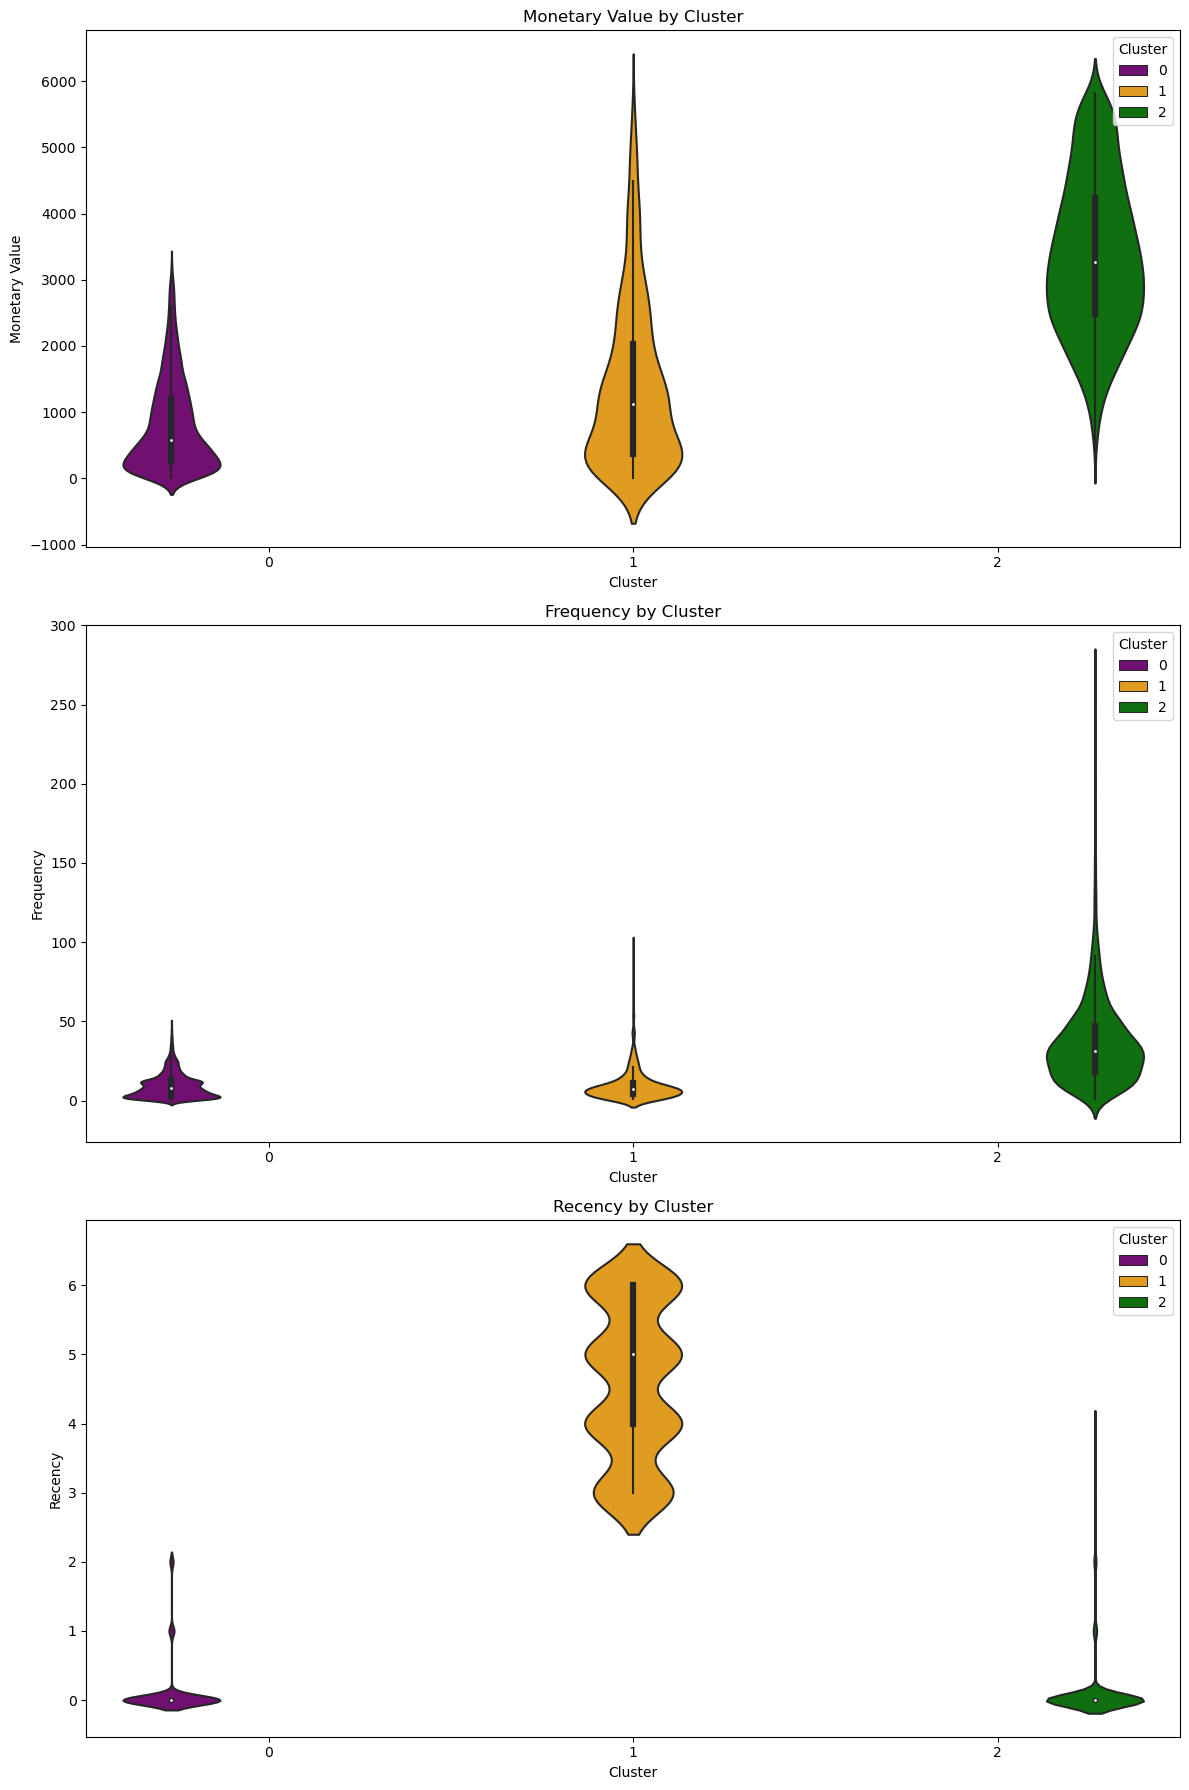

In [64]:
non_outliers_dataset["Cluster"] = y_kmeans 

plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["MonetaryValue"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["Frequency"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["Recency"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()






In [65]:
non_outliers_dataset.groupby("Cluster")[["MonetaryValue", "Frequency", "Recency"]].mean()


,MonetaryValue,Frequency,Recency
Cluster,,,
0,796.461406,9.336509,0.109653
1,1402.171087,9.305085,4.568567
2,3364.551643,36.311404,0.098136


#### 1. Cluster 0(Purple) : "Regular"
* Rationale: This cluster represents active credit card users who use their cards consistently but do not spend very high amounts.They are moderate spenders
* Action: Maintain engagement with card users, set rewards for hitting specific spending targets to improve spending 

#### 2. Cluster 1(Orange): "Re-Engage"
* Rationale: This cluster represents in-active credit card users who previously used their cards moderately and spent above the average user. They are previously valuable card users.
* Action: Re-engage card users with special offers or hard to resist deals and create a steady engagement plan.

#### 3. Cluster 2(Green): "Premium"
* Rationale: This cluster represents the most valuable credit card users who are high spenders, very active and very frequent card users. 
* Action: Reward loyalty of card users, offer exclusive benefits by providing them with personalized customer service, customizable cards and unlimited spending limits.

### Hierarchical Clustering

/var/folders/f3/fqxdbsyn3jq3f5wlphvdssgm0000gn/T/ipykernel_1878/2252970727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_dataset["Cluster"] = y_hc


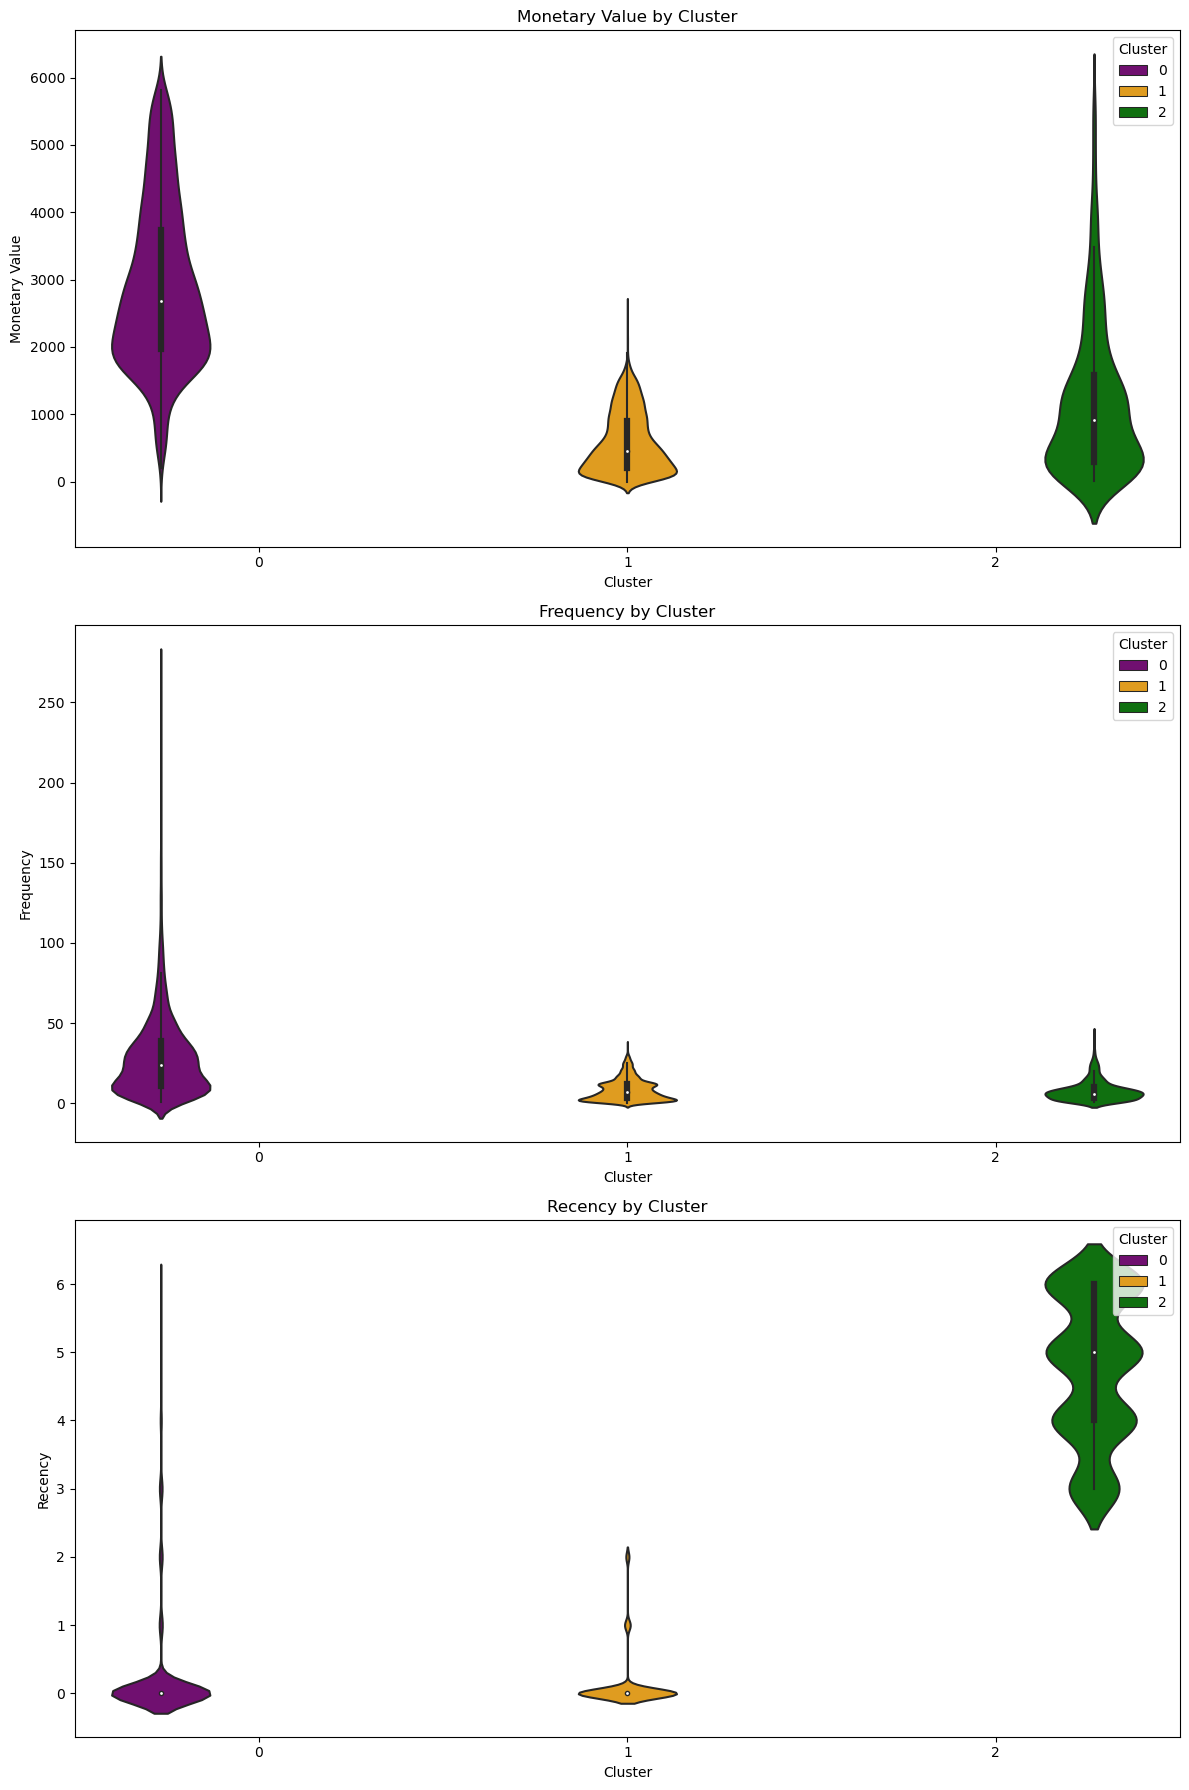

In [66]:
non_outliers_dataset["Cluster"] = y_hc

plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["MonetaryValue"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["Frequency"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_dataset["Cluster"], y = non_outliers_dataset["Recency"], palette = cluster_colors, hue = non_outliers_dataset["Cluster"])
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

In [67]:
non_outliers_dataset.groupby("Cluster")[["MonetaryValue", "Frequency", "Recency"]].mean()

,MonetaryValue,Frequency,Recency
Cluster,,,
0,2904.621209,28.751888,0.199928
1,583.165663,8.490192,0.111087
2,1176.756624,7.844248,4.738053


#### 1. Cluster 0(Purple) : "Premium"
* Rationale: This cluster represents the most valuable credit card users who are high spenders, very active and very frequent card users. 
* Action: Reward loyalty of card users, offer exclusive benefits by providing them with personalized customer service, customizable cards and unlimited spending limits.


#### 2. Cluster 1(Orange): "Regular"
* Rationale: This cluster represents active credit card users who use their cards consistently but do not spend very high amounts.They are moderate spenders
* Action: Maintain engagement with card users, set rewards for hitting specific spending targets to improve spending 

#### 3. Cluster 2(Green): "Re-Engage"
* Rationale: This cluster represents in-active credit card users who previously used their cards moderately and spent above the average user. They are previously valuable card users.
* Action: Re-engage card users with special offers or hard to resist deals and create a steady engagement plan.

## Algorithm Comparison

In [69]:
from sklearn.metrics import silhouette_score

#K-Means 
y_kmeans = kmeans.fit_predict(scaled_data_dataset)
kmeans_silhouette = silhouette_score(scaled_data_dataset, y_kmeans)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

#Hierarchical Clustering 
y_hc = hc.fit_predict(scaled_data_dataset)
hc_silhouette = silhouette_score(scaled_data_dataset, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette}")




K-Means Silhouette Score: 0.5465451097204633
Hierarchical Clustering Silhouette Score: 0.47563112919550726


#### Interpreting the results
* Silhouette score of 1.0 means a perfect clustering
* Silhouette score between 0.5 - 0.7 means good clustering
* Silhouette score between 0.25 - 0.5 means weak or overlapping clustering
* Silhouette score below 0 is poor clustering 


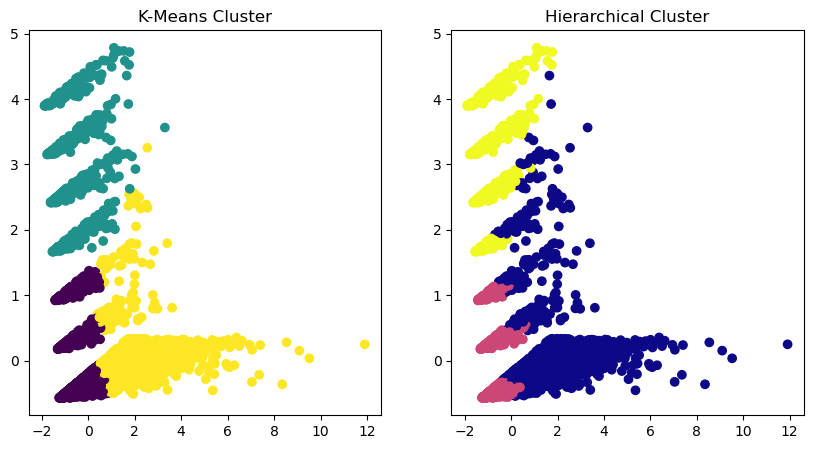

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_dataset)

plt.figure(figsize=(10, 5))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Cluster')

# Hierarchical
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_hc, cmap='plasma')
plt.title('Hierarchical Cluster')

plt.show()


Therefore we make use of the KMeans Algorithm, seeing as the silhouette score for kmeans is higher than hierarchical and confirming that the PCA plot appears more compact compared to hierarchical.

In [81]:
overlap_indices = monetary_outliers_dataset.index.intersection(frequency_outliers_dataset.index)

monetary_only_outliers = monetary_outliers_dataset.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_dataset.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_dataset.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outliers_clusters_dataset = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outliers_clusters_dataset






,CUST_ID,Recency,Frequency,MonetaryValue,Cluster
1,C10002,0,4,6442.945483,-1
22,C10024,0,26,12222.765626,-1
35,C10037,1,11,8873.375046,-1
38,C10040,0,12,7136.922877,-1
47,C10052,4,46,9432.068614,-1
...,...,...,...,...,...
7428,C17878,0,73,5853.943132,-3
7942,C18435,0,62,6573.871877,-3
8039,C18536,0,123,10458.978150,-3
8250,C18773,0,130,8209.770000,-3


/var/folders/f3/fqxdbsyn3jq3f5wlphvdssgm0000gn/T/ipykernel_1878/4069944985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_dataset["Cluster"] = y_kmeans


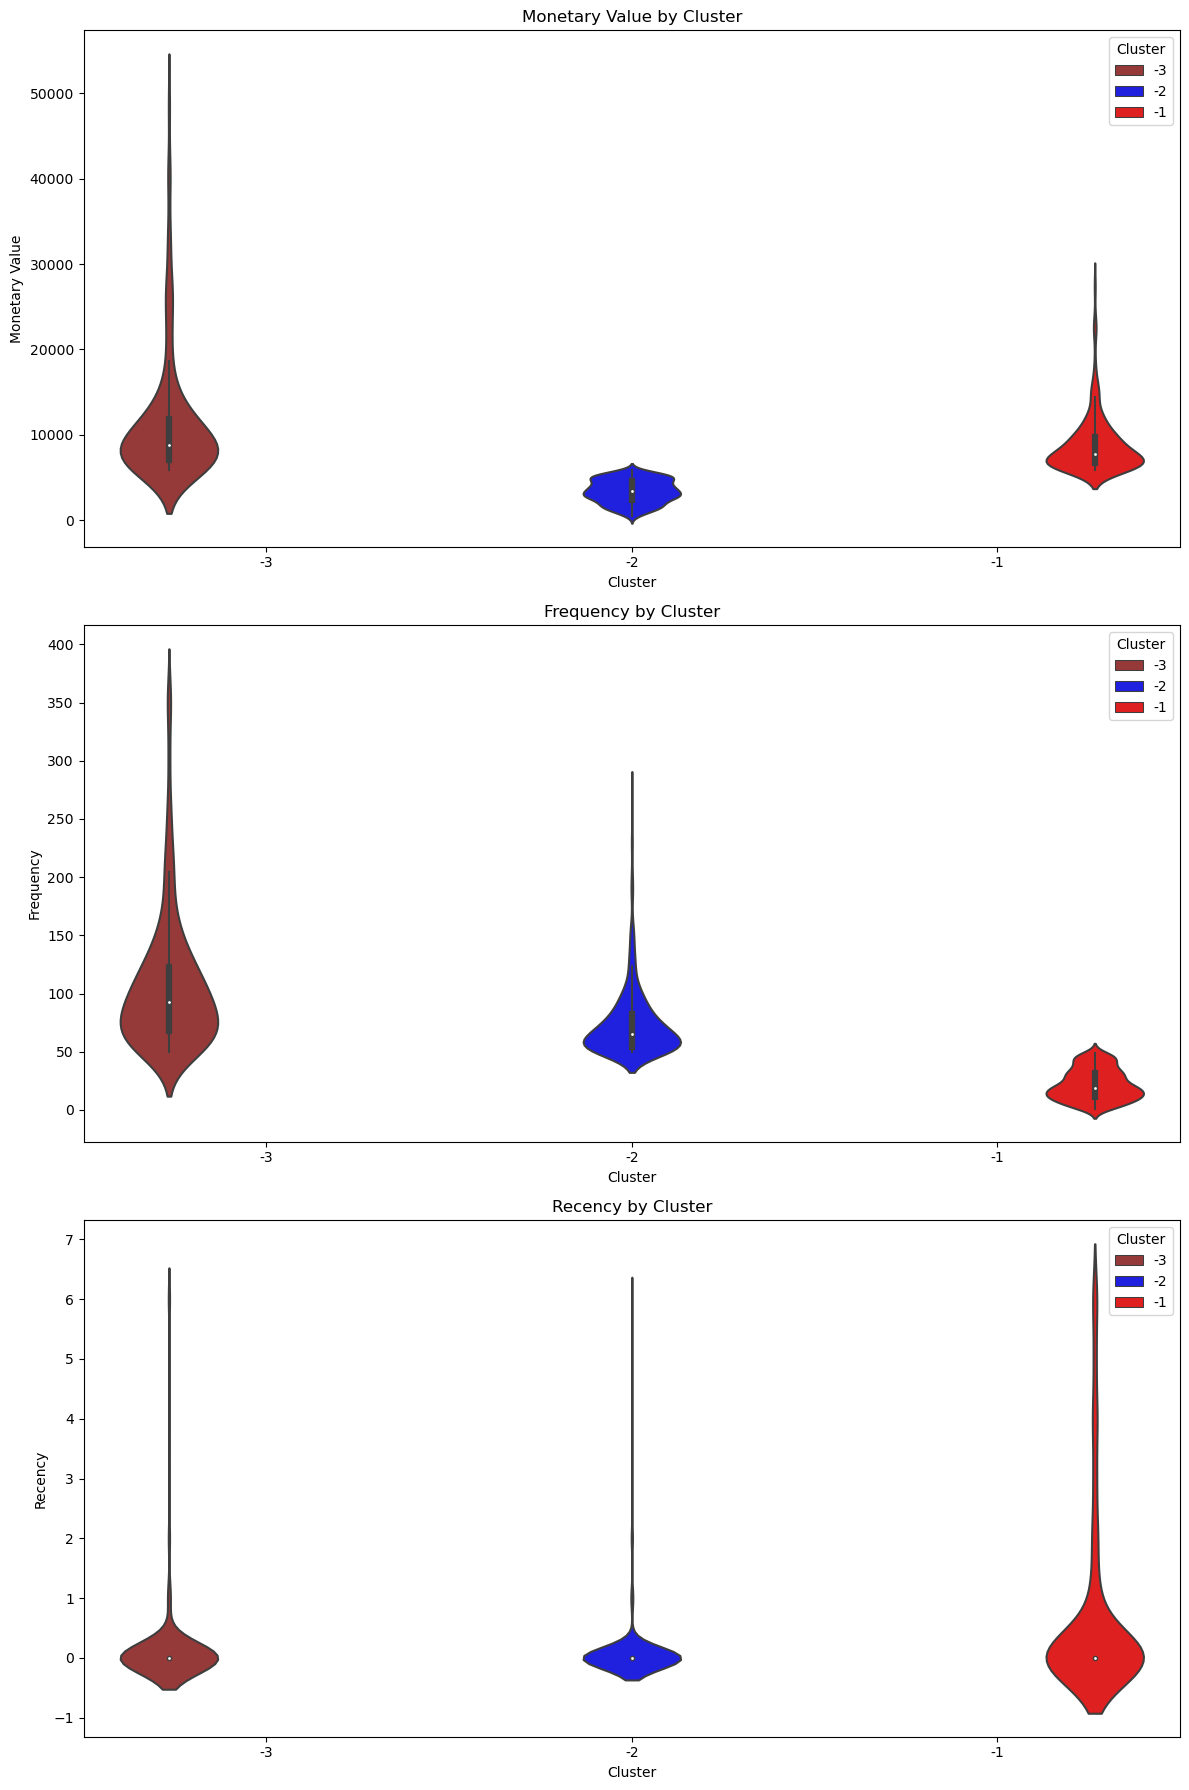

In [82]:

cluster_colors = {-1: "red",
                  -2: "blue",
                  -3: "brown"}

non_outliers_dataset["Cluster"] = y_kmeans 

plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = outliers_clusters_dataset["Cluster"], y = outliers_clusters_dataset["MonetaryValue"], palette = cluster_colors, hue = outliers_clusters_dataset["Cluster"])
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3, 1, 2)
sns.violinplot(x = outliers_clusters_dataset["Cluster"], y = outliers_clusters_dataset["Frequency"], palette = cluster_colors, hue = outliers_clusters_dataset["Cluster"])
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = outliers_clusters_dataset["Cluster"], y = outliers_clusters_dataset["Recency"], palette = cluster_colors, hue = outliers_clusters_dataset["Cluster"])
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()


Cluster -1 = PAMPER
Cluster -2 = UPSELL
Cluster -3 = DELIGHT

In [83]:
cluster_labels = {
    0: "REGULAR",
    1: "RE-ENGAGE",
    2: "PREMIUM", 
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [85]:
full_clustering_dataset = pd.concat([non_outliers_dataset, outliers_clusters_dataset])

full_clustering_dataset


,CUST_ID,Recency,Frequency,MonetaryValue,Cluster
0,C10001,0,2,95.400000,0
2,C10003,0,12,773.170000,0
3,C10005,0,1,16.000000,0
4,C10006,0,8,1333.280000,0
6,C10008,0,12,436.200000,0
...,...,...,...,...,...
7428,C17878,0,73,5853.943132,-3
7942,C18435,0,62,6573.871877,-3
8039,C18536,0,123,10458.978150,-3
8250,C18773,0,130,8209.770000,-3


In [88]:
full_clustering_dataset["ClusterLabel"] = full_clustering_dataset["Cluster"].map(cluster_labels)

full_clustering_dataset


,CUST_ID,Recency,Frequency,MonetaryValue,Cluster,ClusterLabel
0,C10001,0,2,95.400000,0,REGULAR
2,C10003,0,12,773.170000,0,REGULAR
3,C10005,0,1,16.000000,0,REGULAR
4,C10006,0,8,1333.280000,0,REGULAR
6,C10008,0,12,436.200000,0,REGULAR
...,...,...,...,...,...,...
7428,C17878,0,73,5853.943132,-3,DELIGHT
7942,C18435,0,62,6573.871877,-3,DELIGHT
8039,C18536,0,123,10458.978150,-3,DELIGHT
8250,C18773,0,130,8209.770000,-3,DELIGHT


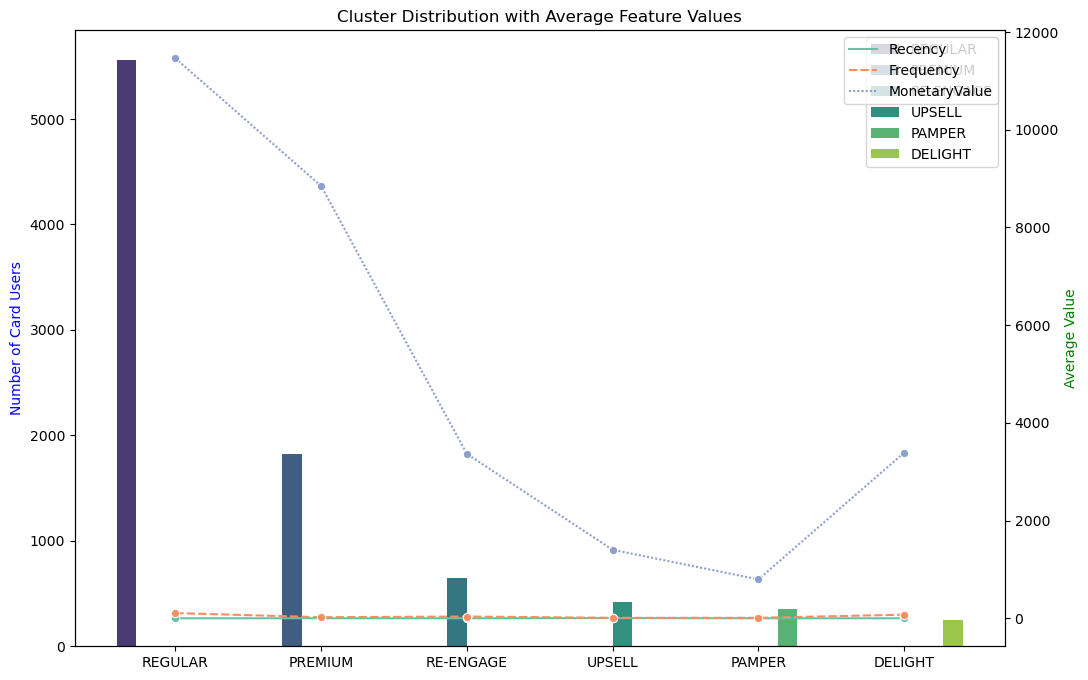

In [97]:
cluster_counts = full_clustering_dataset["ClusterLabel"].value_counts()
feature_means = full_clustering_dataset.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue"]].mean()

fig, ax1 = plt.subplots(figsize = (12, 8))

sns.barplot(x = cluster_counts.index, y = cluster_counts.values, ax =ax1, palette = "viridis", hue = cluster_counts.index)
ax1.set_ylabel("Number of Card Users", color = "b")
ax1.set_title("Cluster Distribution with Average Feature Values")

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax = ax2, palette = "Set2", marker = "o")
ax2.set_ylabel("Average Value", color = "g")

plt.show()
